## Logistic Regression Analysis

### Introduction

This project explores Logistic Regression, a fundamental classification algorithm used in machine learning. The objective is to predict categorical outcomes based on input features.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset

- Features: Multiple independent variables (e.g., age, income, education level)
- Target Variable: A binary outcome (e.g., yes/no, pass/fail, 0/1)
- Source: Public datasets or synthetic data for experimentation

In [2]:
data = pd.read_csv("C:/Users/gahuk/OneDrive/Desktop/libexec/notes/SEM 6/GreenAIWorkshop/green_tech_data.csv")
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [3]:
data.shape

(100, 5)

In [4]:
data.ndim

2

In [5]:
data.tail()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
95,222.828459,414.288617,0.522243,4.688408,0
96,232.956490,753.360111,0.769994,4.362857,0
97,199.639356,907.399234,0.215821,2.430473,0
98,58.896694,898.377782,0.622890,3.878920,0
99,87.761999,801.887991,0.085347,3.895443,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [7]:
data.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carbon_emissions,100.0,214.563260,104.121294,51.932741,117.620266,212.449859,305.571092,395.410428
energy_output,100.0,548.048551,263.800127,106.256917,317.804074,555.062371,789.565238,987.085409
renewability_index,100.0,0.517601,0.293426,0.005062,0.276880,0.562555,0.752367,0.990054
cost_efficiency,100.0,2.710170,1.320535,0.564771,1.623267,2.793732,3.810999,4.957273
sustainability,100.0,0.150000,0.358870,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
data.columns

Index(['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency', 'sustainability'],
      dtype='object')

In [10]:
data.axes

[RangeIndex(start=0, stop=100, step=1),
 Index(['carbon_emissions', 'energy_output', 'renewability_index',
        'cost_efficiency', 'sustainability'],
       dtype='object')]

### Data Preprocessing

- Handling missing values
- Normalizing numerical features
- Encoding categorical variables
- Splitting data into training and test sets

In [11]:
data.isnull()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,False,False,False,False,False
97,False,False,False,False,False
98,False,False,False,False,False


In [12]:
data.isnull().sum()

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64

In [13]:
data.isnull().sum().sum()

0

In [14]:
data.describe(include='all')

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [15]:
#handle missing values
#data.fillna(data.mean(),inplace=True)

In [16]:
x = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency',	'sustainability']]
y = data['sustainability'] #target varaible

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Development

- Using sklearn.linear_model.LogisticRegression
- Training the model using gradient descent optimization
- Evaluating using metrics like accuracy, precision, recall, and F1-score

In [18]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [20]:
#accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  1.0


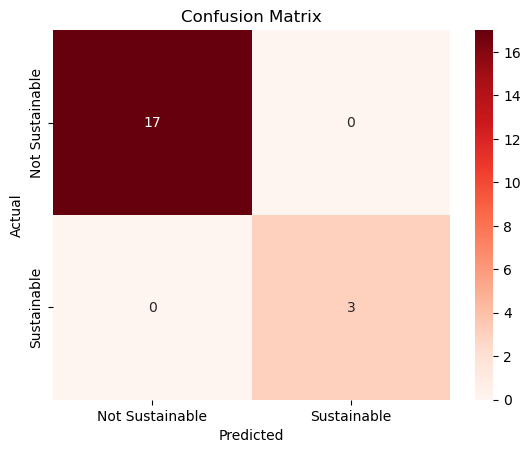

In [21]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
           xticklabels=['Not Sustainable', 'Sustainable'],
           yticklabels=['Not Sustainable', 'Sustainable']
           )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
print(classification_report(y_test, y_pred, target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       1.00      1.00      1.00        17
    Sustainable       1.00      1.00      1.00         3

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20



coefficients = pd.DataFrame(model.coef_.T, index=x.columns, columns=['Coefficient'])
print(coefficients)

In [23]:
data.corr()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
carbon_emissions,1.000000,-0.034033,-0.037654,-0.211882,-0.441912
energy_output,-0.034033,1.000000,-0.146354,-0.011783,-0.102749
renewability_index,-0.037654,-0.146354,1.000000,-0.214816,0.336193
cost_efficiency,-0.211882,-0.011783,-0.214816,1.000000,-0.361310
sustainability,-0.441912,-0.102749,0.336193,-0.361310,1.000000


### Results & Interpretation

- Confusion matrix for classification performance
- ROC-AUC curve to assess model discrimination ability
- Feature importance analysis

In [24]:
import joblib
#save the model
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

### Conclusion

- Logistic Regression is effective for binary classification tasks.
- Model performance depends on feature selection and preprocessing.
- Future improvements include regularization techniques and advanced models like Decision Trees or Neural Networks.